In [28]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import sklearn
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
data = pd.read_csv("data")

In [7]:
data.head(3)

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


We can see that we have 2 columns. Since we only need "news", without "dates", we will create a separate list of "news", as required by the question.

In [9]:
news= data["News"].values

In [62]:
news= data["News"].values
isinstance(news, list)

False

In [63]:
news_list = []
for item in news:
  news_list.append(item)
news = news_list
isinstance(news, list)

True

Preprocessing: only keep most used words

In [64]:
MAX_VOCAB = 9999

In [65]:
# Based on word frequency
tokenizer = Tokenizer(num_words = MAX_VOCAB,
                      filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      oov_token = 'UNK',
                      lower="True"
                      )

In [66]:
tokenizer.fit_on_texts(news)

In [67]:
seq = tokenizer.texts_to_sequences(news)

In [68]:
len(seq) == len(news)

True

In [19]:
seq[0]

[6,
 1,
 53,
 99,
 183,
 4,
 229,
 158,
 1131,
 1505,
 117,
 1360,
 6982,
 7,
 441,
 6,
 923,
 502,
 1165,
 1,
 1,
 1,
 131,
 1,
 57,
 8,
 2372,
 12,
 299,
 131,
 41,
 1315,
 4,
 1]

In [20]:
tokenizer.word_index["hi"]

8168

In [21]:
word_index = {}
for k,v in tokenizer.word_index.items():
    if v< MAX_VOCAB:
        word_index[k] = v
word_index["START"] = 0
word_index["END"] = MAX_VOCAB

In [22]:
word_index["START"]

0

In [23]:
word_index["economy"]

419

In [69]:
index_word = { v : k for k,v in word_index.items()}

In [72]:
index_word[0]

'START'

In [29]:
# Shuffle to make it random
random.shuffle(seq)

In [30]:
sequences = []
for sequence in seq:
    sequences.append([0] + sequence + [MAX_VOCAB])

In [31]:
sequences[0]

[0, 1, 540, 2127, 289, 1480, 36, 2536, 247, 1, 8810, 420, 1, 9999]

Let's try to create transition matrix

In [75]:
sequences_flat_list = []
for sublist in sequences:
    for item in sublist:
        sequences_flat_list.append(item)

In [34]:
sequences_flat_list[0:100]

[0,
 1,
 540,
 2127,
 289,
 1480,
 36,
 2536,
 247,
 1,
 8810,
 420,
 1,
 9999,
 0,
 426,
 94,
 422,
 4,
 2513,
 5,
 464,
 209,
 1,
 790,
 94,
 1141,
 12,
 114,
 4,
 1,
 1847,
 464,
 209,
 3740,
 10,
 4322,
 1,
 343,
 8,
 464,
 209,
 2394,
 3,
 2501,
 4,
 12,
 70,
 80,
 2036,
 4,
 2,
 1640,
 5,
 229,
 9999,
 0,
 2824,
 1646,
 3,
 8547,
 149,
 3803,
 815,
 2824,
 29,
 149,
 3803,
 2746,
 1679,
 2179,
 1494,
 5,
 64,
 620,
 9999,
 0,
 235,
 91,
 24,
 79,
 92,
 1057,
 4,
 214,
 2179,
 125,
 50,
 9999,
 0,
 4537,
 1,
 1226,
 1,
 1955,
 8,
 33,
 1188,
 689,
 4271]

In [35]:
def transition_matrix(V, sequence):
    Q = [[0]*(V+1) for _ in range(V+1)]
    for (i,j) in zip(sequence,sequence[1:]):
        Q[i][j] += 1

    for row in Q:
        n = sum(row)
        if n > 0:
            row[:] = [f/n for f in row]

    return Q

In [36]:
Q = transition_matrix(MAX_VOCAB, sequences_flat_list)

In [37]:
Q = np.array(Q)

In [38]:
Q.shape

(10000, 10000)

In [77]:
np.sum(Q[1])

1.0

In [83]:
np.sum(Q[0:10000,])

10000.000000000013

In [40]:
# Checking that probabilities add up
probabilities = np.sum(Q, axis = 1)
print(len(probabilities)-sum((probabilities >0.99)))

0


In [85]:
random.seed(2021)
true_sentences = random.sample(sequences,5)

In [86]:
true_sentences

[[0,
  6,
  1000,
  660,
  15,
  4287,
  1,
  2,
  1689,
  8,
  2,
  1587,
  11,
  124,
  22,
  8611,
  362,
  5,
  954,
  1547,
  825,
  1280,
  24,
  79,
  3477,
  4886,
  2778,
  4,
  137,
  7,
  214,
  3459,
  1542,
  238,
  107,
  20,
  3,
  722,
  259,
  42,
  2377,
  8680,
  5,
  358,
  9999],
 [0,
  781,
  7145,
  213,
  94,
  1141,
  12,
  224,
  1871,
  1,
  18,
  1,
  8,
  3198,
  4355,
  1651,
  64,
  2201,
  148,
  356,
  39,
  390,
  180,
  9999],
 [0, 1297, 6, 2335, 535, 65, 24, 7191, 1, 17, 49, 13, 9999],
 [0, 410, 1486, 3973, 10, 1105, 7, 1, 1486, 2188, 9999],
 [0,
  1,
  3,
  2326,
  5395,
  126,
  1,
  13,
  22,
  10,
  6,
  4038,
  1910,
  31,
  112,
  2683,
  2,
  787,
  404,
  13,
  9999]]

In [43]:
def likelihood_test(sentences, T_matrix):
    n = len(sentences)
    likelihood = [0]*n
    for sentence in range(n):
        for (i,j) in zip(sentences[sentence],sentences[sentence][1:]):
            if T_matrix[i,j] != 0:
                likelihood[sentence] += np.log(T_matrix[i,j])
            else:
                likelihood[sentence] += np.log(10**(-18))
        likelihood[sentence] = likelihood[sentence]/len(sentences[sentence])

    return likelihood

In [44]:
true_likelihood = likelihood_test(true_sentences,Q)
print(true_likelihood)

[-3.863439835548537, -3.7136936630690256, -4.305679400513897, -3.8139928552872067, -4.833726249194242]


In [45]:
# Average log-likelihood for true sentences
average_loglikelihood = np.mean(true_likelihood)
average_loglikelihood

-4.106106400722582

In [46]:
def max_min(sequences):
    lengths = [len(seq) for seq in sequences]
    maxim = max(lengths)
    minim = min(lengths)
    return minim, maxim

max_min(seq)

(2, 65)

In [47]:
# Create fake sentences as a check
fake_sentences = []

for i in range(5):
    length_random = random.randint(2,65)
    sentence_fake = random.sample(range(1,MAX_VOCAB-1), length_random)
    fake_sentences.append(sentence_fake)

In [ ]:
len(fake_sentences[0])

In [48]:
fake_sequences_comparison = []
for sentence in fake_sentences:
    fake_sequences_comparison.append([0] + sentence + [MAX_VOCAB])

In [49]:
fake_sequences_comparison[0]

[0,
 8897,
 2596,
 1502,
 7501,
 3934,
 3434,
 6714,
 3364,
 9905,
 2440,
 7725,
 7412,
 1721,
 2650,
 8047,
 8806,
 7792,
 670,
 7255,
 809,
 5652,
 3556,
 1993,
 8715,
 1533,
 4309,
 2547,
 431,
 8833,
 4922,
 7601,
 3890,
 5033,
 8216,
 7534,
 4010,
 8445,
 671,
 8560,
 3942,
 4024,
 9325,
 4822,
 4854,
 2100,
 6930,
 6332,
 4755,
 2655,
 7362,
 5723,
 1629,
 1457,
 3849,
 3928,
 9999]

In [50]:
fake_likelihood = likelihood_test(fake_sequences_comparison,Q)
print(fake_likelihood)

[-40.719399539263165, -36.84136148790473, -39.66672401607064, -40.76708033497658, -39.830874670944084]


In [51]:
# Average log-likelihood for fake sentences
average_loglikelihood_fake = np.mean(fake_likelihood)
average_loglikelihood_fake

-39.56508800983185

In [52]:
def create_matrix(sequences, V):
  N = len(sequences)
  tensor_data = np.zeros((N, V))
  for i, sequence in enumerate(sequences):
    tensor_data[i, sequence] = 1.
  return tensor_data

In [53]:
D = 8
learning_rate = 0.0001
epochs = 1 # to check, for computational efficiency

In [54]:
W_1 = np.array([ [ np.random.rand() for i in range(D) ] for j in range(MAX_VOCAB+2) ])
W_2 = np.array([ [ np.random.rand() for i in range(MAX_VOCAB+2) ] for j in range(D) ])

In [57]:
def new_sgd(sentence, learning_rate, W_1, W_2):

  sentence_matrix = create_matrix(sentence, MAX_VOCAB+2)
  feature_matrix = sentence_matrix[:len(sentence_matrix)-1,:]
  target_matrix = sentence_matrix[1:, :]


  hidden_matrix = np.tanh(W_1[sentence[:-1]])
  prediction_matrix = softmax(hidden_matrix.dot(W_2))

  # Gradients
  N_matrix = np.array([ [ 1 for i in range(D) ] for j in range(len(sentence_matrix)-1) ])
  gW_2 = np.transpose(hidden_matrix).dot(prediction_matrix - target_matrix)
  gW_1 = np.transpose(feature_matrix).dot(np.multiply((prediction_matrix - target_matrix).dot(np.transpose(W_2)), (N_matrix-np.multiply(hidden_matrix, hidden_matrix))))

  W_1 -= learning_rate*gW_1
  W_2 -= learning_rate*gW_2

  cost = tf.keras.losses.categorical_crossentropy(target_matrix, prediction_matrix).numpy()

  return W_1, W_2, cost.sum()


In [58]:
full_costs = []

random.shuffle(sequences)

for i in range(0,len(sequences)):
  W_1, W_2, tmp_cost = new_sgd(sequences[i], learning_rate, W_1, W_2)
  full_costs.append(tmp_cost)

In [59]:
# Exponentially weighted moving average, with a smoothing factor of 0.01
ewma = pd.Series(full_costs).ewm(alpha=0.01).mean()

In [60]:
plotting_data = pd.DataFrame({'Loss': full_costs, "EWMA Loss": ewma, 'Batch': range(1, len(full_costs)+1)})
plotting_data.head()

,Loss,EWMA Loss,Batch
0,75.538462,75.538462,1
1,110.632582,93.173699,2
2,149.542603,112.152489,3
3,103.313966,109.909436,4
4,195.782771,127.431048,5


Text(0.5, 1.0, 'EWMA Loss')

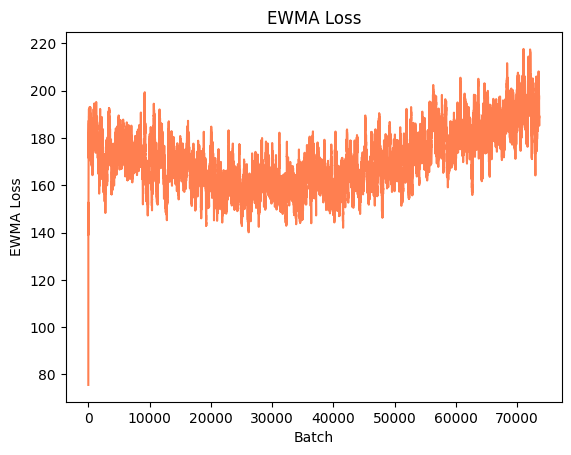

In [61]:
sns.lineplot(x = 'Batch', y = 'EWMA Loss', data = plotting_data, color = "coral").set_title('EWMA Loss')